# <span style='color:blue'> <center>Knowledge Discovery in Data</center> </span>
## **Capítulo 2.** Limpieza de Datos
#### by **Ivan Alducin**
<p><img src="https://miro.medium.com/max/700/1*6NZejVJz5nmxgHeWWTc2Iw.png" width="1000"></p>

## Limpieza de Datos
<p>A continuaciòn dejaremos algunas tecnicas de limpieza de datos, las cuales, no son necesariamente consecutivas, podemos empezar en cualquier punto, pero pueden servir como un mapa del procedimiento que podemos seguir:
 <li> Datos nulos </li>
 <li> Datos atípicos (Outliers) </li>
 <li> Datos inconsistente (Duplicados, capitalización, etc) </li>
</p>

In [1]:
# Importar pandas, numpy, matplotlib y seaborn
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar el archivo de train a un DataFrame
df = pd.read_csv('train.csv')

In [11]:
df.shape

(30471, 292)

In [12]:
# Vamos a explorar el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [6]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [7]:
df.dtypes

id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object

In [14]:
# Vamos a dividir las variables númericas y las variables categóricas (object)
numeric_cols = df.select_dtypes(include=['number']).columns

non_numeric_cols = df.select_dtypes(exclude=['number']).columns

In [15]:
numeric_cols.values

array(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state', 'area_m',
       'raion_popul', 'green_zone_part', 'indust_part',
       'children_preschool', 'preschool_quota',
       'preschool_education_centers_raion', 'children_school',
       'school_quota', 'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'office_raion', 'full_all', 'male_f', 'female_f', 'young_all',
       'young_male', 'young_female', 'work_all', 'work_male',
       'work_female', 'ekder_all', 'ekder_male', 'ekder_female',
       '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male',
       '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all',
       '16_29_male', '16_29_female', '0_13_a

In [20]:
non_numeric_cols.values

array(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion',
       'railroad_terminal_raion', 'big_market_raion',
       'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line',
       'big_road1_1line', 'railroad_1line', 'ecology'], dtype=object)

## Datos Nulos (Missing Data)
<p>Trabajar con datos faltantes o nulos, puede resultar una de las tareas dentro de la <i>Limpieza de Datos</i> que pareciera ser muy sencilla, aunque no siempre es asi. Además hay que tomar algo en cuenta, la mayoría de los modelos predictivos no aceptan variables con datos nulos, por lo que esto es algo siempre necesario. A continuación veremos tres técnicas que nos permitiran manejar este tipos de casos: </p>

##### <li>Heatmap</li>

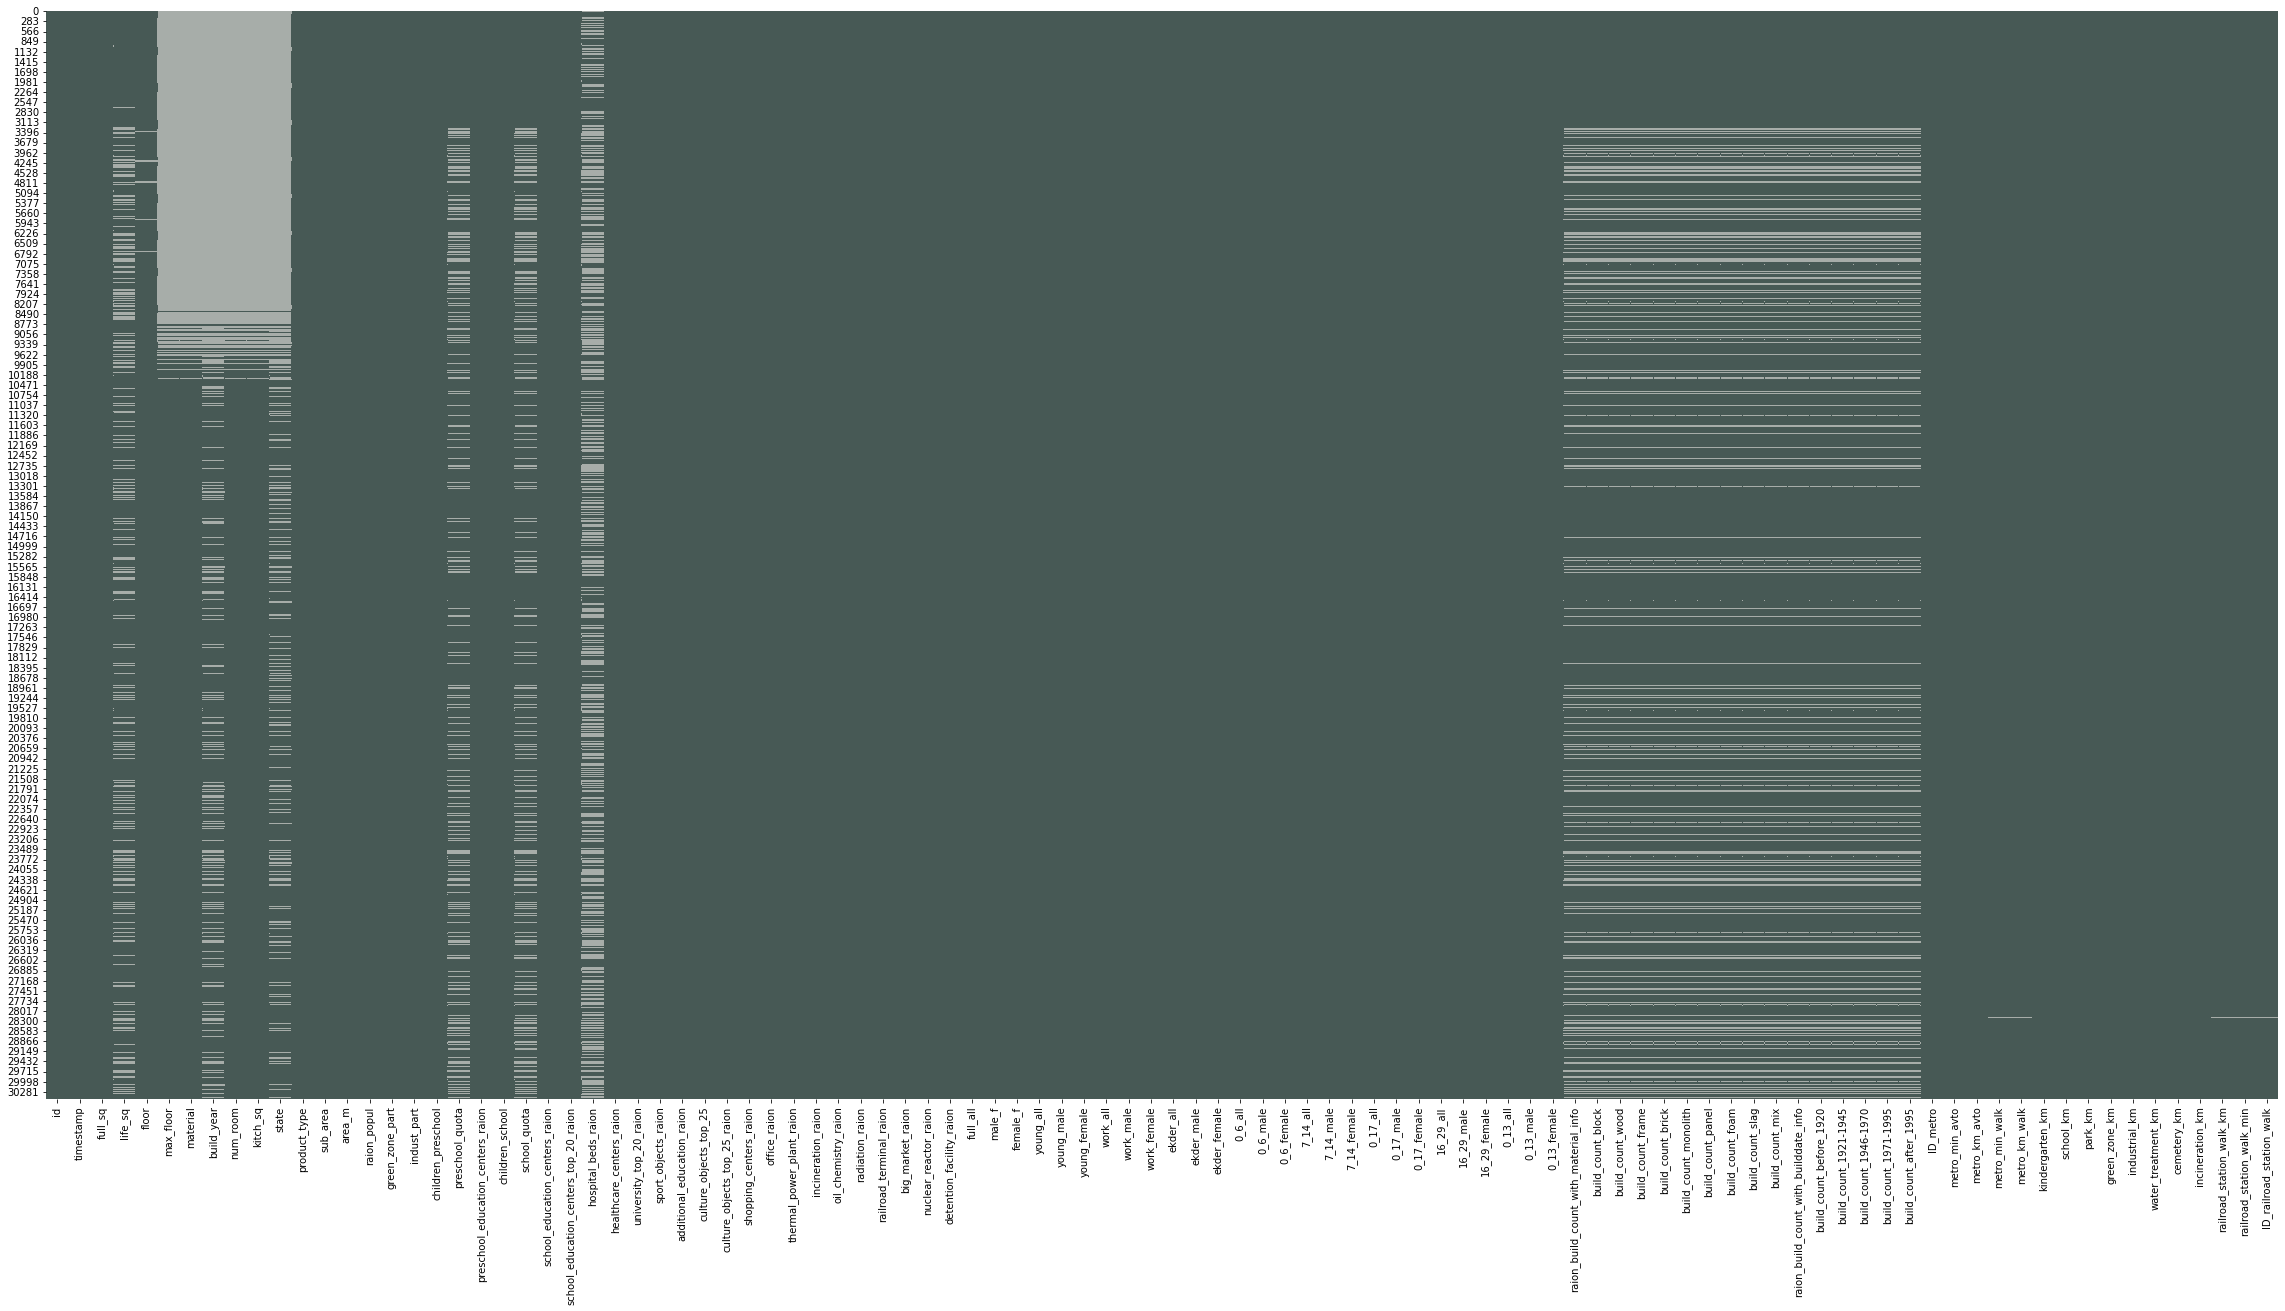

In [29]:
# Seleccionar la cantidad de columnas que quieres visualizar (Puedes no hacerlo)
cols = df.columns[:100]

# Vamos colocar dos colores diferentes uno para datos completos y otro para los faltantes (En código Hex)
colours = ['#475955', '#a7ada9']

# Graficar el heatmap con los datos nulos
plt.figure(figsize=(40,20))
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours), cbar=False)


##### <li>Porcentaje de observaciones por columna</li>

In [ ]:
# Vamos a hacer un ciclo para iterar en las columnas
for ____:
    # Almacenamos el porcentaje de datos nulos por columna
    pct_missing = ____
    print('{} - {}%'.format(____, round(pct_missing*100)))

In [ ]:
# Reto: Convierte a DataFrame el ejercicio anterior


##### <li>Total de columnas sin datos</li>

In [ ]:
# Vamos a crear un ciclo para calcular el total de datos nulos por columna
for ____:
    # Verificaremos si la columna contiene nulos
    missing = ____
    
    # Calcular el total de datos nulos en la columna
    num_missing = np.sum(missing)
    
    # Con esta condición crearemos una nueva columna con el identificador 'ismissing' en caso de contener algún valor nulo
    if num_missing > 0:  
        df['{}_ismissing'.format(col)] = missing

In [ ]:
# Crear una lista para almacenar solo aquellas columnas con el identificador 'ismissing'
ismissing_cols = [____ for ____ in _____ if _____ in ____]

# Sumar el total de columnas vacias por cada observación
df['num_missing'] = df[____].sum(____)

# Grafico de barras (x = # de Columnas, y = Total de obervaciones)
df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing', figsize=(18, 8))

## ¿Que hacemos con los datos nulos?
<p>No hay como tal, un proceso exacto para tratar con los datos nulos, tenemos que hacer un estudio de las variables en cuestión para decidir la mejor manera de manejarlos. A continuación se describen los cuatro métodos más comunes para manejar los datos faltantes. Pero, si la situación es más complicada de lo habitual, debemos ser creativos para utilizar métodos más sofisticados, que veremos más adelante ;)</p>




##### <li> 1. Eliminar la observación </li>
<p> Solo si estamos seguros de que los datos que faltan no son informativos, lo realizamos. De lo contrario, deberíamos considerar otras soluciones. Por ejemplo, a partir del histograma de datos faltantes, notamos que solo una cantidad mínima de observaciones tienen más de 35 variables faltantes en total. Asi que podemos crear un nuevo conjunto de datos que cumpla esta condición </p>

In [ ]:
# Crea un nuevo DataFrame eliminando las observaciones con la condición anterior
____

##### <li> 2. Eliminar la variable </li>
<p> Solo si estamos seguros de que los datos que faltan no son informativos, lo realizamos. De lo contrario, deberíamos considerar otras soluciones. Por ejemplo, de la lista de datos faltantes creadas anteriormente, notamos que <code>hospital_beds_raion</code> tiene un alto porcentaje de valores faltantes con un poco mas del 47%, entonces podemos tomar la decision de eliminar esta variable. O podemos ser más restrictivos y eliminar variables con un porcentaje menor de datos nulos. Tu tomas la decisión ;)</p>

In [ ]:
# Crea una lista con las variables a eliminar
cols_to_drop = ____

# Crea un DataFrame eliminando las variables de la lista anterior
____

##### <li> 3. Rellenar nulos </li>
<p> Cuando tenemos una variable numérica, podemos realizar la <i>imputación</i> de datos faltantes. Reemplazamos los valores faltantes con el valor promedio o mediana de esta. Cuando tenemos una variable categórica, podemos imputar los datos faltantes por la moda (el valor más frecuente). Usando <code>life_sq</code> como ejemplo, podemos rellenar los valores faltantes de esta variable por su mediana.</p>

In [ ]:
# Calcula la mediana de la variable
med = ____

# Rellena los valores nulos con la estadística anterior
df['life_sq'] = ____

In [ ]:
# Reto 1: Vamos a hacer esto para todas las variables numericas
for col in numeric_cols:
    ____
    ____
    ____
    

In [ ]:
# Reto 2: Hagamos lo mismo para todas las variables categoricas
for col in non_numeric_cols:
    ____
    ____
    ____

## Datos Atipicos (Outliers)
<p>Los valores atípicos son datos que claramente son <i>diferentes</i> de otras observaciones (Puede haber muchas razones). Podrían ser valores atípicos reales o errores. Existen varias formas de encontrarlos, a continuaciòn listamos algunas: </p>

##### <li>Histogramas</li>

In [ ]:
# Grafica un histograma de la variable 'life_sq'
____

##### <li>Boxplots</li>

In [ ]:
# Grafica una grafica de caja para la misma variable del ejercicio anterior
____

##### <li>Estadística Descriptiva</li>

In [ ]:
# Imprime la estadística descriptiva de la misma variable
____

##### <li>Graficos de barras (Variables categóricas)</li>

In [ ]:
# Crea un grafico de barras de los valores de la columna 'ecology'
____

## Datos Inconsistentes
<p>Todos los datos que alimentan el modelo deben servir para el propósito del proyecto. Los datos innecesarios son cuando los datos no agregan valor alguno o incluso son redundantes. A continuación tres posibles escenarios (<i>¿Que otros puede haber?</i>).</p>

##### <li> 1. Datos repetitivos </li>
Podemos crear una lista de variables con un alto porcentaje del mismo valor. Por ejemplo, mostremos a continuación, variables con más del 95 % de filas con el mismo valor.

In [ ]:
# Calcular el total de observaciones
num_rows = len(df.index)

# Crear una lista vacía para almacenar las variables con alto porcentaje de repetidos
my_list = ____ 

for ____ in ____:
    # Contar la proporción de los valores de las columnas
    count = df[____].____(dropna=False)
    
    # Calcular el porcentaje del valor principal de la columna (Este calculo puede contener mas de dos valores) y el total de observaciones
    top_pct = (____ / ____)
    
    if top_pct > 0.95:
        my_list.append(____)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(count)
        print('__________________________________')

##### <li> 2. Datos duplicados </li>
Los datos duplicados son cuando existen copias de la misma observación. Existen dos tipos básicamente

<b> Tipo 1: </b>Los datos duplicados basados en una sola variable, como un identificador único que pudiera estar repetido. veamoslo en el siguiente ejercicio

In [ ]:
# Elimina las observaciones con duplicados en la columna 'id'
df_without_duplicate1 = ____

# Comparemos si realmente teniamos datos duplicados con el DataFrame original



<b> Tipo 2: </b> El siguiente caso en cuando tenemos duplicados conformados por mas de una variable. Por ejemplo, las posibilidades de que ocurran dos transacciones al mismo tiempo, con lel mismo tamaño, el mismo precio y el mismo año de construcción son cercanas a cero.
Podemos configurar un grupo de variables críticas como identificadores únicos para poder llevar a cabo esta tarea. En este ejercicio Incluiremos  la lista de variables que se tiene a continuación, el objetivo es eliminar las observaciones bajo este identificador en conjunto. 

In [ ]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

# Agrupemos las observaciones unicas por este identificador en conjunto (Para tener visibilidad si existen registros de esta naturaleza)
____

In [ ]:
# Elimina los duplicados que cumplan la condición anterior
df_without_duplicate2 = ____

# Comparemos si realmente teniamos datos duplicados con el DataFrame original




##### <li> 3. Formatos </li>
Por último tenemos que tratar con la conversión entre formatos de datos para que estos sean consistentes con los resultados que queremos obtener. Un ejemplo es convertir un campo en formato de cadena de texto <code>Object</code> a formato <code>DateTime</code>.

In [ ]:
# Convierte el campo 'timestamp' a DateTime en formato yyyy-mm-dd
____

# Crea nuevos campos con el desglose de la fecha a día, mes y día de la semana
df['year'] = ____
df['month'] = ____
df['weekday'] = ____